In [24]:
#Historical TMI maps

#conda install netCDF4
#import sys
#print(sys.executable)
#!conda list

In [1]:
# DEVELOP TMI MAPS
#1. Collect future rainfall and temperature data from 
# a. https://esgf-node.llnl.gov/search/cmip6/
# b.https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=overview
    #Note: In TMI calculation, mean monthly temperature is used. This is synonymous with air temperature at 1.25m or 2m above sea level. 
    #Therefore, when collecting temp data from https://cds.climate.copernicus.eu/ use Near Surface air temperature as this corresponds to air temperature at 1.25m or 2m above sea level
#2. Convert the netCDF files into geotiff or CSV in Rstudio or Python
#3. Import the data here
#4. Apply TMI equation
#5. Develop future TMI maps

#Install the necessary libraries in LS-env environment
#conda install -c conda-forge matplotlib
#conda install cartopy #to visualize the TMI map
#conda install netCDF4

import calendar #used to calculate N, number of days in a month#
import math
import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt #to plot the maps
import cartopy.crs as crs
import csv

In [4]:
#Read merged historical rainfall and temperature data
merged = pd.read_csv("/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/CRU/Converted/merged_2011_20.csv")

In [5]:
merged

,Unnamed: 0,Unnamed: 0_left,Lat,Lon,Time,Year,Month,Day_left,Precipitation,Unnamed: 0_right,Day_right,Temperature
0,0,0,-89.75,-179.75,2011-01-16 00:00:00,2011,1,16,NaN,0,16,NaN
1,1,1,-89.75,-179.25,2011-01-16 00:00:00,2011,1,16,NaN,1,16,NaN
2,2,2,-89.75,-178.75,2011-01-16 00:00:00,2011,1,16,NaN,2,16,NaN
3,3,3,-89.75,-178.25,2011-01-16 00:00:00,2011,1,16,NaN,3,16,NaN
4,4,4,-89.75,-177.75,2011-01-16 00:00:00,2011,1,16,NaN,4,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
31103995,31103995,31103995,89.75,177.75,2020-12-16 00:00:00,2020,12,16,NaN,31103995,16,NaN
31103996,31103996,31103996,89.75,178.25,2020-12-16 00:00:00,2020,12,16,NaN,31103996,16,NaN
31103997,31103997,31103997,89.75,178.75,2020-12-16 00:00:00,2020,12,16,NaN,31103997,16,NaN
31103998,31103998,31103998,89.75,179.25,2020-12-16 00:00:00,2020,12,16,NaN,31103998,16,NaN


In [ ]:
merged

In [6]:
#Collect temp and prep data for Inventory points 
from scipy.spatial import KDTree
Inventory = pd.read_csv("/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/Landslides/Data/Inventory/CSV/Combined121223.csv")

#Create KDTree from merged
tree = KDTree(merged[['Lat', 'Lon']])
#Find the nearest neighbor for each point in Inventory
distances, indices = tree.query(Inventory[['latitude', 'longitude']])
#Create new columns in Inventory
Inventory['Temperature'] = merged.loc[indices, 'Temperature'].reset_index(drop=True)
Inventory['Precipitation'] = merged.loc[indices, 'Precipitation'].reset_index(drop=True)

In [7]:
Inventory

,Unnamed: 0,geometry,Name,descriptio,Landslides,latitude,longitude,Temperature,Precipitation
0,0,POINT (34.69778717523016 1.7508164887489481),Mount Kadam,2017-07-25,1,1.750816,34.697787,23.0,90.5
1,1,POINT (34.69796683828699 1.7509063202773596),Mount Kadam,2017-07-25,1,1.750906,34.697967,23.0,90.5
2,2,POINT (34.6980566698154 1.7510859833341836),Mount Kadam,2017-07-25,1,1.751086,34.698057,23.0,90.5
3,3,POINT (34.69832616440064 1.750996151805771),Mount Kadam,2017-07-25,1,1.750996,34.698326,23.0,90.5
4,4,POINT (34.698685490514286 1.7509063202773594),Mount Kadam,2017-07-25,1,1.750906,34.698685,23.0,90.5
...,...,...,...,...,...,...,...,...,...
6741,6741,POINT (33.607681577951126 3.377395973704166),NonLS,2017-07-05,0,3.377396,33.607682,24.1,98.9
6742,6742,POINT (33.6075019148943 3.377665468289402),NonLS,2017-07-05,0,3.377665,33.607502,24.1,98.9
6743,6743,POINT (33.60750191489431 3.377934962874637),NonLS,2017-07-05,0,3.377935,33.607502,24.1,98.9
6744,6744,POINT (33.60768157795112 3.3777552998178137),NonLS,2017-07-05,0,3.377755,33.607682,24.1,98.9


In [10]:
#Extract date data 
Inventory['date'] = pd.to_datetime(Inventory['descriptio'], format='%Y-%m-%d', errors='coerce')
#Extract the separate columns
Inventory['Year'] = Inventory['date'].dt.year
Inventory['Month'] = Inventory['date'].dt.month
Inventory['Day'] = Inventory['date'].dt.day

In [11]:
Inventory = Inventory.drop('Unnamed: 0', axis=1)

In [12]:
data = Inventory

In [13]:
#Remove rows with Temperature and Precipitation = NaN
data = data.dropna(subset=['Temperature', 'Precipitation'], how='all')

In [14]:
data['Prp'] = data['Precipitation']*0.1

In [15]:
data['Lat_r'] = data['latitude']* math.pi/180

In [16]:
def collect_sol_dec(Day):
    """
    Calculate solar declination from day of the year.

    Based on FAO equation 24 in Allen et al (1998).

    :param day_of_year: Day of year integer between 1 and 365 or 366).
    :return: solar declination [radians]
    :rtype: float
    """
    #_check_doy(day_of_year)
    return 0.409 * math.sin(((2.0 * math.pi / 365.0) * Day - 1.39))

In [17]:
def collect_sunset_hour_angle(Lat_r, sol_dec):
    """
    Calculate sunset hour angle (*Ws*) from latitude and solar
    declination.

    Based on FAO equation 25 in Allen et al (1998).

    :param latitude: Latitude [radians]. Note: *latitude* should be negative
        if it in the southern hemisphere, positive if in the northern
        hemisphere.
    :param sol_dec: Solar declination [radians]. Can be calculated using
        ``sol_dec()``.
    :return: Sunset hour angle [radians].
    :rtype: float
    """
    #_check_latitude_rad(latitude)
    #_check_sol_dec_rad(sol_dec)

    cos_sha = -math.tan(Lat_r) * math.tan(sol_dec)
    # If tmp is >= 1 there is no sunset, i.e. 24 hours of daylight
    # If tmp is <= 1 there is no sunrise, i.e. 24 hours of darkness
    # See http://www.itacanet.org/the-sun-as-a-source-of-energy/
    # part-3-calculating-solar-angles/
    # Domain of acos is -1 <= x <= 1 radians (this is not mentioned in FAO-56!)
    return math.acos(min(max(cos_sha, -1.0), 1.0))

In [18]:
#Calculate daylight hours #from: https://github.com/woodcrafty/PyETo/blob/master/pyeto/fao.py
def collect_daylight_hours(sha):
    """
    Calculate daylight hours from sunset hour angle.

    Based on FAO equation 34 in Allen et al (1998).

    :param sha: Sunset hour angle [rad]. Can be calculated using
        ``sunset_hour_angle()``.
    :return: Daylight hours.
    :rtype: float
    """
   # _check_sunset_hour_angle_rad(sha)
    return (24.0 / math.pi) * sha

In [19]:
#Calculate Solar declination
data['sol_dec'] = data['Day'].apply(collect_sol_dec)

In [20]:
data['sha'] = data.apply(lambda row: collect_sunset_hour_angle(row['Lat_r'], row['sol_dec']), axis=1)

In [21]:
#Calculate 'd', number of daylight hours per day
data['d'] = data['sha'].apply(collect_daylight_hours)

In [22]:
#Calculate I
# Define a function to calculate monthly 'i'
def calculate_i(Temperature):
    if Temperature < 0: #Thornthwaite and Mather, 1957
        i = 0
    else:
        
        i = (0.2 * Temperature) ** 1.514 #This equation only applies for temperature >= 0 deg Celsius
    return i

data['i'] = data['Temperature'].apply(calculate_i)

data['I'] = data.groupby(['latitude', 'longitude'])['i'].transform('sum')

In [24]:
#Calculate PE, see updated equations from: https://www.mdpi.com/1996-1073/14/20/6760 accessed 31/10/23
def calculate_PE(row):
    # Extract the required values from the row
    I = row['I']
    Year = row['Year']
    Month = row['Month']
    d = row['d']
    Temperature = row['Temperature'] #temperature should be in degrees Celsius
    
    # Check if any of these values are NaN, and handle them
    if pd.isna(Year) or pd.isna(Month) or pd.isna(Temperature) or pd.isna(I) or pd.isna(d):
        return np.nan  # Return NaN or another default value if any required field is missing

    # Convert 'Year' and 'Month' columns to integers
    year = int(Year)
    month = int(Month)
    d = int(d)


    # Check if Temperature is zero and handle it
    if Temperature <= 0: #Thornthwaite and Mather, 1957
        PE = 0
    else:
        # Calculate the coefficient 'a' in the PE equation
        a = ((6.75e-7 * (I ** 3)) - (7.711e-5 * I ** 2) + (0.01792 * I) + 0.49239) #Should range 0<a<4.25

        # Convert 'Year' and 'Month' columns to integers
        year = int(Year)
        month = int(Month)

        # Calculate the adjustment factor in the PE  #Refer to: https://www.researchgate.net/publication/308114644_Review_of_calculation_procedures_of_thornthwaite_moisture_index_and_its_impact_on_footing_design
        N = calendar.monthrange(year, month)[1] #Number of days in calendar month
        f1 = d / 12  #Day length correction factor
        f2 = N / 30.0 #Adjustment factor for number of days per month

        # Calculate PE
        PE = (f1 * f2 * 1.6 * ((10 * Temperature / I) ** a))
    
    return PE

data['PE'] = data.apply(calculate_PE, axis=1) #the unit of PE returned from this equation is cm
#Different methods to calculate PE are in: https://etcalc.hydrotools.tech/pageMain.php

In [39]:
# Alternative method to calculate TMI (simplified) to avoid change in soil water storage
# Method 4 in this paper: [insert your paper link here]
# Calculate the summation of P and PE for each lat, lon
groupedS = data.groupby(['latitude', 'longitude', 'Year']).agg({'Prp': 'sum', 'PE': 'sum'}).reset_index()

# Calculate Ih and Ia
groupedS['P'] = groupedS['Prp']
groupedS['Tt_PE'] = groupedS['PE']
groupedS = groupedS[groupedS['Tt_PE'] != 0]#where Tt_PE = 0, the results will not be meaningful
groupedS['Landslides'] = data['Landslides']
# Calculate TMI if Tt_PE is not equal to 0
groupedS['TMI'] = (75 * ((groupedS['P'] / groupedS['Tt_PE']) - 1)) + 10

# Create a new DataFrame with lat, lon, Ih, and Ia
TMI_new = groupedS[['latitude', 'longitude', 'Landslides', 'P', 'Tt_PE', 'TMI', 'Year']]

# Print the resulting DataFrame
print(TMI_new)


      latitude  longitude  Landslides          P      Tt_PE        TMI  Year
0    -1.427160  29.936614           1  13.190001  12.098634  16.765437  2011
1    -1.426960  29.936471           1  13.190001  12.098624  16.765501  2011
2    -1.426889  29.937369           1  13.190001  12.098621  16.765523  2011
3    -1.426767  29.937384           1  13.190001  12.098615  16.765562  2011
4    -1.341750  29.885969           1  13.190001  12.102740  16.737696  2018
...        ...        ...         ...        ...        ...        ...   ...
2707  3.720884  31.738118           0  12.500000  13.787812   2.994836  2013
2708  3.735859  31.901811           0  12.500000  13.368575   5.127144  2015
2709  3.744761  33.495270           0   7.040000  13.281779 -25.246289  2014
2710  3.746974  32.766482           0   5.960000  13.359262 -31.540067  2012
2711  3.749138  33.901600           0   2.250000  13.126560 -52.144385  2015

[2712 rows x 7 columns]


In [25]:
# Monthly TMI
# Method 4 in this paper: [insert your paper link here]
Monthly = data
#Monthly['Landslides'] = data['Landslides']
# Calculate TMI if Tt_PE is not equal to 0
Monthly['TMI'] = (75 * ((data['Prp'] / data['PE']) - 1)) + 10

# Create a new DataFrame with lat, lon, Ih, and Ia
TMI_monthly = Monthly[['latitude', 'longitude', 'Landslides', 'Prp', 'PE', 'TMI', 'Year', 'Month', 'Day']]

# Print the resulting DataFrame
print(TMI_monthly)

      latitude  longitude  Landslides   Prp         PE       TMI    Year  \
0     1.750816  34.697787           1  9.05  12.162461 -9.193037  2017.0   
1     1.750906  34.697967           1  9.05  12.162461 -9.193037  2017.0   
2     1.751086  34.698057           1  9.05  12.162461 -9.193037  2017.0   
3     1.750996  34.698326           1  9.05  12.162461 -9.193037  2017.0   
4     1.750906  34.698685           1  9.05  12.162461 -9.193037  2017.0   
...        ...        ...         ...   ...        ...       ...     ...   
6741  3.377396  33.607682           0  9.89  11.783474 -2.051669  2017.0   
6742  3.377665  33.607502           0  9.89  11.783474 -2.051669  2017.0   
6743  3.377935  33.607502           0  9.89  11.783474 -2.051669  2017.0   
6744  3.377755  33.607682           0  9.89  11.783474 -2.051669  2017.0   
6745  3.377935  33.607861           0  9.89  11.783474 -2.051669  2017.0   

      Month   Day  
0       7.0  25.0  
1       7.0  25.0  
2       7.0  25.0  
3      

In [26]:
TMI_monthly.to_csv("/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/Landslides/Data/Inventory/CSV/Combined_Monthly_061223.csv")

In [29]:
TMI_monthly[(TMI_monthly['TMI']>=50)&(TMI_monthly['Landslides']==0)]

,latitude,longitude,Landslides,Prp,PE,TMI,Year,Month,Day
2502,2.512408,34.816185,0,24.6,12.482646,82.805199,2017.0,7.0,5.0
2503,2.512588,34.816365,0,24.6,12.482646,82.805199,2017.0,7.0,5.0
2504,2.512678,34.816455,0,24.6,12.482646,82.805199,2017.0,7.0,5.0
2505,2.512408,34.816814,0,24.6,12.482646,82.805199,2017.0,7.0,5.0
2506,2.512408,34.817263,0,24.6,12.482646,82.805199,2017.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...
3552,2.642844,34.772258,0,24.6,12.482646,82.805199,2017.0,7.0,5.0
3553,2.643023,34.772168,0,24.6,12.482646,82.805199,2017.0,7.0,5.0
3554,2.643113,34.771988,0,24.6,12.482646,82.805199,2017.0,7.0,5.0
3555,2.643113,34.772258,0,24.6,12.482646,82.805199,2017.0,7.0,5.0


In [1144]:
#Drop rows with inf 
# Replace inf and -inf with NaN
#TMI_new.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the 'TMI' column
#TMI_new.dropna(subset=['TMI'], inplace=True)


In [42]:
max_TMI = TMI_new['TMI'].max()
print(max_TMI)

230.24268663699738


In [43]:
min_TMI = TMI_new['TMI'].min()
print("Minimum TMI value:", min_TMI)

Minimum TMI value: -60.59229222212757


In [381]:
#Where temperatures are close or less than 0 and precipitation is high, potential evapotranspiration is negligible during those months and may be returning high TMI.
#Convert all TMI>100 to the limit of 100

# Create a copy of the original DataFrame
TMI_data = TMI_new.copy()

# Replace TMI values greater than 100 with 100
TMI_data['TMI'] = TMI_data['TMI'].apply(lambda x: min(x, 100))

In [49]:
#Where temperatures are close or less than 0 and precipitation is high, potential evapotranspiration is negligible during those months and may be returning high TMI.
#Convert all TMI>100 to the limit of 110

# Create a copy of the original DataFrame
#TMI_data = TMI_new.copy()

# Replace TMI values greater than 100 with 110
#TMI_data['TMI'] = TMI_data['TMI'].apply(lambda x: min(x, 110))

In [50]:
#max_TMI = TMI_data['TMI'].max()
#print(max_TMI)

110.0


In [1149]:
#plt.hist(TMI_data['TMI'], bins=50, range=(-70, 110))

In [1150]:
#TMI_data[(TMI_data.Lat>25.25)&(TMI_data.Lon>133.75)]

In [1151]:
# Count the number of TMI values between -40 and -20
#count = ((TMI_2001_data['TMI'] >= 80) & (TMI_2001_data['TMI'] <= 100)).sum()
#count = ((TMI_data['TMI'] < -40) & (TMI_data['TMI'] <= -40)).sum()
# Print the count
#print("Count:", count)

In [382]:
# Remove rows with non-numeric values in the 'TMI' column
TMI_ab = TMI_data[pd.to_numeric(TMI_data['TMI'], errors='coerce').notna()]

# Convert 'TMI' to string type
TMI_ab['TMI'] = TMI_ab['TMI'].astype(str)

# Extract the real part from complex numbers (if your 'TMI' column contains complex numbers)
TMI_ab['TMI'] = TMI_ab['TMI'].str.replace(r'N[0-9a-fA-F]+N', '', regex=True)
TMI_ab['TMI'] = TMI_ab['TMI'].str.replace('+', 'j').str.replace('j', '+', regex=False)
TMI_ab['TMI'] = TMI_ab['TMI'].str.extract(r'([-+]?\d*\.\d+|\d+)', expand=False).astype(float)

/var/folders/pr/_06pztgj1tvf2n01hdjmhbxc0000gn/T/ipykernel_17585/3965027326.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  TMI_ab['TMI'] = TMI_ab['TMI'].str.replace('+', 'j').str.replace('j', '+', regex=False)


In [27]:
#To be used by category map
# Remove rows with non-numeric values in the 'TMI' column
TMI_cat = TMI_new[pd.to_numeric(TMI_data['TMI'], errors='coerce').notna()]

# Convert 'TMI' to string type
TMI_cat['TMI'] = TMI_cat['TMI'].astype(str)

# Extract the real part from complex numbers (if your 'TMI' column contains complex numbers)
TMI_cat['TMI'] = TMI_cat['TMI'].str.replace(r'N[0-9a-fA-F]+N', '', regex=True)
TMI_cat['TMI'] = TMI_cat['TMI'].str.replace('+', 'j').str.replace('j', '+', regex=False)
TMI_cat['TMI'] = TMI_cat['TMI'].str.extract(r'([-+]?\d*\.\d+|\d+)', expand=False).astype(float)

/var/folders/pr/_06pztgj1tvf2n01hdjmhbxc0000gn/T/ipykernel_1958/2059614449.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  TMI_cat['TMI'] = TMI_cat['TMI'].str.replace('+', 'j').str.replace('j', '+', regex=False)


In [1153]:
#TMI_new[TMI_new.TMI<-40]

In [1096]:
'''
#Save the TMI file as a netCDF file
import xarray as xr

# Convert the DataFrame to a Dataset
dataset = xr.Dataset({
    'Lat': ('index', TMI_new['Lat']),
    'Lon': ('index', TMI_new['Lon']),
    'P': ('index', TMI_new['P']),
    'TMI': ('index', TMI_new['TMI']),
    'Year': ('index', TMI_new['Year'])
})

# Save the Dataset as a NetCDF file
dataset.to_netcdf('/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/TMI2010.nc')
'''

"\n#Save the TMI file as a netCDF file\nimport xarray as xr\n\n# Convert the DataFrame to a Dataset\ndataset = xr.Dataset({\n    'Lat': ('index', TMI_new['Lat']),\n    'Lon': ('index', TMI_new['Lon']),\n    'P': ('index', TMI_new['P']),\n    'TMI': ('index', TMI_new['TMI']),\n    'Year': ('index', TMI_new['Year'])\n})\n\n# Save the Dataset as a NetCDF file\ndataset.to_netcdf('/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/TMI2010.nc')\n"

In [52]:
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [53]:
import xarray
from PIL import Image #to save a tiff

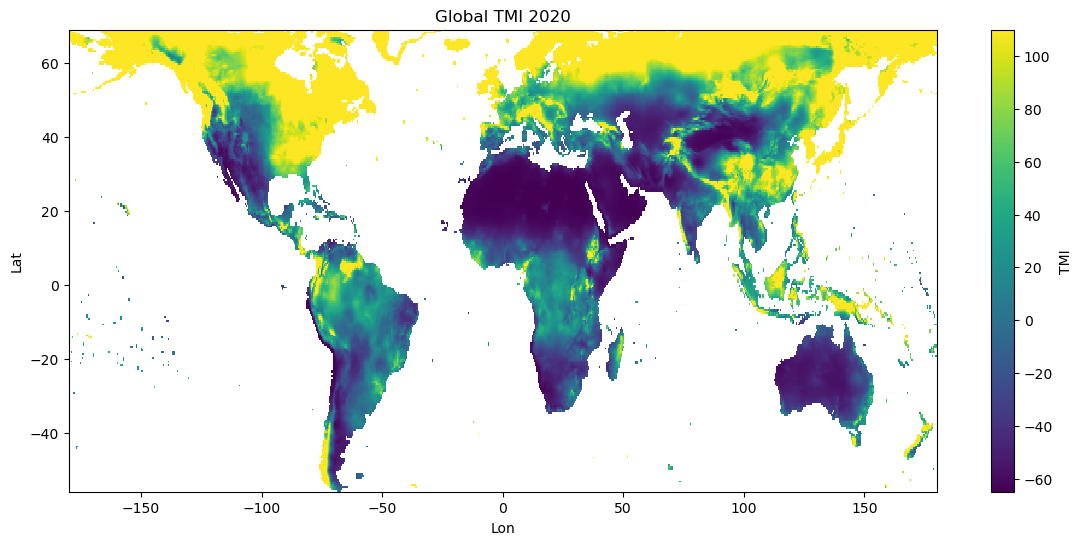

In [30]:
# Create TMI map for absolute values
#Consider using the method of Inverse Distance Weighting (IDW)

# Define the time period (assuming 'Year' is in datetime format)
time_period = TMI_ab['Year'].iloc[0]

data = TMI_ab.loc[:, ['Lat', 'Lon', 'TMI']].set_index(['Lat', 'Lon']).to_xarray()

data_min = data['TMI'].min()
data_max = data['TMI'].max()

vmin = data_min
vmax = data_max
#vmin = -100
#vmax = 100

# Plot the map using 'TMI' and the specified colormap
fig, ax = plt.subplots(figsize=(14, 6))
data.TMI.plot.pcolormesh(vmin=vmin, vmax=vmax)

# Set plot title
ax.set_title(f'TMI {time_period}')

# Set aspect ratio to be equal to prevent squashing
ax.set_aspect('auto') #You can use 'equal', 'auto', '1.0' to adjust the aspect ratio. Usimg 'auto' allows you to adjust the figsize

# Specify the file path to save the PNG
output_file = f'/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/TMI maps/TMIabsolute/TMIpng/TMIX_{time_period}S.png'

# Specify the file path to save the TIFF
tiff_output_file = f'/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/TMI maps/TMIabsolute/TMItiff/TMIX_{time_period}S.tiff'

# Save the plot as a PNG with the specified file path
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# Save the plot as a TIFF with the specified file path
plt.savefig(tiff_output_file, dpi=300, bbox_inches='tight')

# Save the plot as a GeoTIFF
with rasterio.open(tiff_output_file, 'w', driver='GTiff', width=data.sizes['Lon'], height=data.sizes['Lat'], count=1, dtype=str(data['TMI'].dtype)) as dst:
    dst.write(data['TMI'].data, 1)

# Show the saved GeoTIFF (optional)
show(rasterio.open(tiff_output_file))


In [7]:
import ee
import geemap
#import geemap.eefolium as geemap

In [ ]:
# Authenticate to your Earth Engine account
ee.Authenticate()
ee.Initialize()

In [10]:
import pandas as pd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [384]:
from PIL import Image #to create gif
import os #to create gif
import glob #access the directory
import imageio
import imageio.v3 as iio
from pathlib import Path

In [387]:
#Create GIF

# Directory path containing your PNG files
directory = '/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/TMI maps/TMIabsolute/TMIpng'

images = list()
for file in sorted(Path(directory).iterdir()):  # Sort the files
    if not file.is_file():
        continue

    # Skip .DS_Store files
    if file.name == ".DS_Store":
        continue

    images.append(str(file))  # Convert the Path object to a string

# Specify the output GIF file
output_gif = '/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/TMI maps/TMIFlood.gif'

# Create a GIF from the list of PNG file paths
with imageio.get_writer(output_gif, mode='I', duration=1) as writer:
    for image in images:
        frame = imageio.imread(image)  # Read the image directly
        writer.append_data(frame)

print("GIF created successfully!")


/var/folders/pr/_06pztgj1tvf2n01hdjmhbxc0000gn/T/ipykernel_17585/485365269.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(image)  # Read the image directly


GIF created successfully!


In [ ]:
#AVERAGE ANNUAL TMI

In [ ]:
#Using retention tables from Thornwaite and Mather, 1957
#Maximum soil water


In [ ]:
#Calculate Soil water storage using equation derived from Thornthwaite and Mather (1957) soil water tables from Kolka, R. K., & Wolf, A. T. (1998). Estimating actual evapotranspiration for forested sites: Modifications to the Thornthwaite model (Vol. 6). Asheville: US Department of Agriculture, Forest Service, Southern Research Station.https://library.wur.nl/WebQuery/titel/968589
#Sc = Soil water storage
#Ms = Maximum soil water
#Ac = absolute value of accumulated potential water loss

Sc = 10 **((log Ms)- ((0.525/(Ms **1.0371))*Ac)) 

In [ ]:
#Using the retention tables, determine soil water storage 

In [49]:
#Calculate actual evapotranspiration based on conditions

# Iterate through the DataFrame and calculate AE
ae_values = []
for index, row in data_2001_new.iterrows():
    P = row['Prp']
    PE = row['PE']
    
    if P >= PE:
        AE = PE
    else:
        AE = P + Si #Si - change in soil water storage is calculated from the water retention tables or using the SWB module: https://pubs.usgs.gov/tm/tm6-a31/tm6a31.pdf
    
    ae_values.append(AE)

# Add the AE values to the DataFrame
data_2001_new['Actual_Evapotranspiration'] = ae_values

# Print the updated DataFrame
print(data_2001)

In [50]:
# Calculate the soil water storage surplus
data_2001_new['S'] = data_2001_new.apply(lambda row: max(0, row['Prp'] - row['AE'].real), axis=1)#take 0 if P < AE

# Calculate the soil water  deficit
data_2001_new['D'] = data_2001_new['PE'] - data_2001_new['AE']

In [82]:
#Calculate aridity and humidity indices
# Calculate the summation of S, D, and PE for each lat, lon
grouped = data_2001_new.groupby(['Lat', 'Lon']).agg({'S': 'sum', 'D': 'sum', 'PE': 'sum'}).reset_index()

# Calculate Ih and Ia
grouped['Tt_S']= grouped['S']
grouped['Tt_D'] = grouped['D']
grouped['Tt_PE'] = grouped['PE']
grouped['Ih'] = (grouped['S'] * 100) / grouped['PE']
grouped['Ia'] = (grouped['D'] * 100) / grouped['PE']
grouped['Year'] = data_2001_new['Year']

# Create a new DataFrame with lat, lon, Ih, and Ia
TMI_2001 = grouped[['Lat', 'Lon', 'Year','Ih', 'Ia', 'Tt_S', 'Tt_D', 'Tt_PE']]

# Print the resulting DataFrame
print(TMI_2001)


         Lat    Lon  Year                          Ih  \
0     -55.75 -68.25   NaN  4.195535e+03+0.000000e+00j   
1     -55.75 -67.75   NaN  3.843500e+03+0.000000e+00j   
2     -55.75 -67.25   NaN  3.841290e+03+3.718754e+01j   
3     -55.25 -70.75   NaN N000000000000a000000000000N   
4     -55.25 -70.25   NaN N000000000000a000000000000N   
...      ...    ...   ...                         ...   
67415  83.75 -30.75   NaN -2.355892e+01+9.990017e-01j   
67416  83.75 -30.25   NaN -2.109597e+01+1.095153e+00j   
67417  83.75 -29.75   NaN -1.852488e+01+7.250510e-02j   
67418  83.75 -29.25   NaN -2.238072e+01+1.075232e+00j   
67419  83.75 -28.75   NaN -2.553169e+02-2.963862e+01j   

                               Ia         Tt_S                   Tt_D  \
0      3.841814e+03+0.000000e+00j   597.260364   546.905982+0.000000j   
1      3.527809e+03+0.000000e+00j   547.644034   502.662601+0.000000j   
2      3.525963e+03+3.380888e+01j   534.127400   490.280992-0.045322j   
3     N000000000000a000

In [52]:
#Calculate TMI

# Calculate TMI using Ih and Ia
TMI_2001['TMI'] = TMI_2001['Ih'] + 0.6 * TMI_2001['Ia']

print(TMI_2001.head(6))


     Lat    Lon                          Ih                          Ia  \
0 -55.75 -68.25  4.195535e+03+0.000000e+00j  3.841814e+03+0.000000e+00j   
1 -55.75 -67.75  3.843500e+03+0.000000e+00j  3.527809e+03+0.000000e+00j   
2 -55.75 -67.25  3.841290e+03+3.718754e+01j  3.525963e+03+3.380888e+01j   
3 -55.25 -70.75 N000000000000a000000000000N N000000000000a000000000000N   
4 -55.25 -70.25 N000000000000a000000000000N N000000000000a000000000000N   
5 -55.25 -69.75 N000000000000a000000000000N N000000000000a000000000000N   

                      TMI  
0   6500.623579+0.000000j  
1   5960.185776+0.000000j  
2  5956.867943+57.472863j  
3 N0000000000a0000000000N  
4 N0000000000a0000000000N  
5 N0000000000a0000000000N  


/var/folders/pr/_06pztgj1tvf2n01hdjmhbxc0000gn/T/ipykernel_44076/2228119446.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TMI_2001['TMI'] = TMI_2001['Ih'] + 0.6 * TMI_2001['Ia']


In [53]:
min_tmi = TMI_2001['TMI'].min()
print("Minimum TMI value:", min_tmi)

Minimum TMI value: (-151353.44753545985+74594.36020516975j)


In [54]:
max_tmi = TMI_2001['TMI'].max()
print("Maximum TMI value:", max_tmi)

Maximum TMI value: (345315.5013884886+71891.94505127412j)


In [67]:
mean_tmi = TMI_2001['TMI'].mean()
print("Mean TMI:", mean_tmi)

Mean TMI: (3965.5957296590855-626.5872894298709j)


In [68]:
median_tmi = TMI_2001['TMI'].median()
print("Median TMI:", median_tmi)

Median TMI: (2721.083798409022+0j)


In [ ]:
#Data checks on TMI 
#print(tmi_values['TMI'].max())
#print(tmi_values['TMI'].min())
#tmi_values.describe()
#tmi_values.quantile(0.99)

/Users/pamelaacheng/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/Users/pamelaacheng/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6740: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


(array([  81.,   66.,   64.,   86.,   98.,  150.,  223.,  339.,  394.,
         561.,  904., 1036., 1293., 7169., 8715., 7246., 6652., 5495.,
        4366., 3444., 2535., 1957., 1336.,  910.,  651.,  426.,  411.,
         362.,  268.,  209.,  134.,  129.,  113.,   97.,   78.,   85.,
          64.,   58.,   55.,   39.,   37.,   30.,   18.,   18.,   17.,
          20.,   23.,   10.,    9.,   10.]),
 array([-15000., -13900., -12800., -11700., -10600.,  -9500.,  -8400.,
         -7300.,  -6200.,  -5100.,  -4000.,  -2900.,  -1800.,   -700.,
           400.,   1500.,   2600.,   3700.,   4800.,   5900.,   7000.,
          8100.,   9200.,  10300.,  11400.,  12500.,  13600.,  14700.,
         15800.,  16900.,  18000.,  19100.,  20200.,  21300.,  22400.,
         23500.,  24600.,  25700.,  26800.,  27900.,  29000.,  30100.,
         31200.,  32300.,  33400.,  34500.,  35600.,  36700.,  37800.,
         38900.,  40000.]),
 <BarContainer object of 50 artists>)

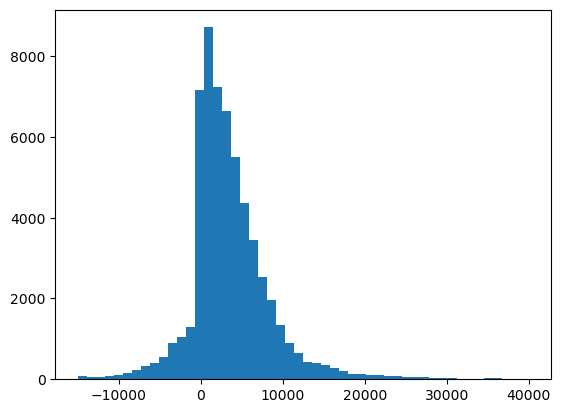

In [55]:
plt.hist(TMI_2001['TMI'], bins=50, range=(-15000, 40000))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        3.0000e+00, 5.0000e+00, 7.0000e+00, 1.3000e+01, 5.2000e+01,
        7.6000e+01, 2.7200e+02, 1.0240e+03, 3.5806e+04, 2.0076e+04,
        1.4380e+03, 2.9900e+02, 8.6000e+01, 3.3000e+01, 6.2000e+01,
        8.3000e+01, 7.3000e+01, 4.3000e+01, 3.7000e+01, 1.9000e+01,
        2.4000e+01, 1.8000e+01, 6.0000e+00, 0.0000e+00, 3.0000e+00,
        6.0000e+00, 4.0000e+00, 1.0000e+00, 4.0000e+00, 2.0000e+00,
        0.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([-150000., -139000., -128000., -117000., -106000.,  -95000.,
         -84000.,  -73000.,  -62000.,  -51000.,  -40000.,  -29000.,
         -18000.,   -7000.,    4000.,   15000.,   26000.,   37000.,
          48000.,   59000.,   70000.,   81000.,   92000.,  103000.,
         114000.,  125000.,  136000.,  147000.

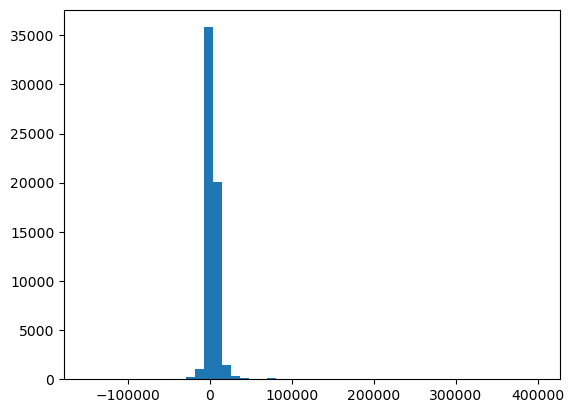

In [75]:
plt.hist(TMI_2001['TMI'], bins=50, range=(-150000, 400000))

(array([ 15.,   9.,   5.,  10.,   8.,  11.,  14.,  11.,  12.,   6.,  12.,
         15.,  19.,   9.,  15.,  19.,  23.,  21.,  16.,  27.,  21.,  30.,
         27.,  29.,  37.,  40.,  28.,  25.,  24.,  47.,  38.,  15., 400.,
        334., 238., 183., 199., 190., 175., 125., 120., 143.,  86., 145.,
        104., 100.,  98.,  73.,  74.,  75.]),
 array([-100.,  -95.,  -90.,  -85.,  -80.,  -75.,  -70.,  -65.,  -60.,
         -55.,  -50.,  -45.,  -40.,  -35.,  -30.,  -25.,  -20.,  -15.,
         -10.,   -5.,    0.,    5.,   10.,   15.,   20.,   25.,   30.,
          35.,   40.,   45.,   50.,   55.,   60.,   65.,   70.,   75.,
          80.,   85.,   90.,   95.,  100.,  105.,  110.,  115.,  120.,
         125.,  130.,  135.,  140.,  145.,  150.]),
 <BarContainer object of 50 artists>)

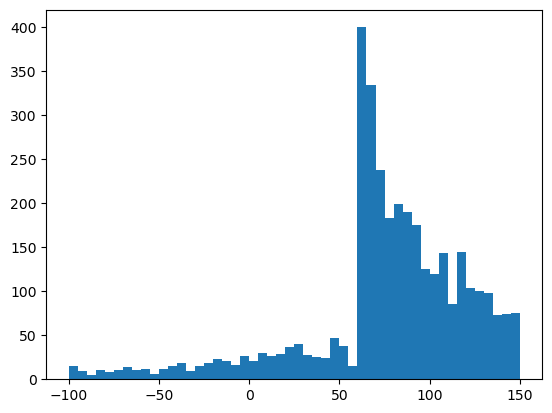

In [79]:
plt.hist(TMI_2001['TMI'], bins=50, range=(-100, 150))

In [56]:
# Remove rows with non-numeric values in the 'TMI' column
TMI_2001 = TMI_2001[pd.to_numeric(TMI_2001['TMI'], errors='coerce').notna()]

# Extract the real part from complex numbers (if your 'TMI' column contains complex numbers)
#TMI_2001['TMI'] = TMI_2001['TMI'].str.replace(r'N[0-9a-fA-F]+N', '', regex=True)
#TMI_2001['TMI'] = TMI_2001['TMI'].str.replace('+', 'j').str.replace('j', '+', regex=False)
#TMI_2001['TMI'] = TMI_2001['TMI'].str.extract(r'([-+]?\d*\.\d+|\d+)', expand=False).astype(float)


In [57]:
print(TMI_2001.head(-6))

         Lat    Lon                      Ih                      Ia  \
0     -55.75 -68.25   4195.535141+0.000000j   3841.814063+0.000000j   
1     -55.75 -67.75   3843.500109+0.000000j   3527.809445+0.000000j   
2     -55.75 -67.25  3841.290304+37.187538j  3525.962732+33.808876j   
12    -54.75 -71.75   3911.782177+0.000000j   3576.347045+0.000000j   
13    -54.75 -71.25   3289.566794+0.000000j   3023.631322+0.000000j   
...      ...    ...                     ...                     ...   
67409  83.75 -33.75  -16.2673170-2.0111330j   85.4488680-1.7841250j   
67410  83.75 -33.25  -17.5303200-2.2177980j   84.3201460-1.9709370j   
67411  83.75 -32.75  -18.5609440-1.5651630j   83.4000350-1.3922570j   
67412  83.75 -32.25  -20.3014220-1.2779070j   81.8449140-1.1404530j   
67413  83.75 -31.75  -20.8872160-0.4066720j   81.3216630-0.3666520j   

                          TMI  
0       6500.623579+0.000000j  
1       5960.185776+0.000000j  
2      5956.867943+57.472863j  
12      6057.590404

/Users/pamelaacheng/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/var/folders/pr/_06pztgj1tvf2n01hdjmhbxc0000gn/T/ipykernel_75662/2972148459.py:20: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  mergedS = gpd.sjoin(world, geo_tmi_df, how='left', op='intersects')


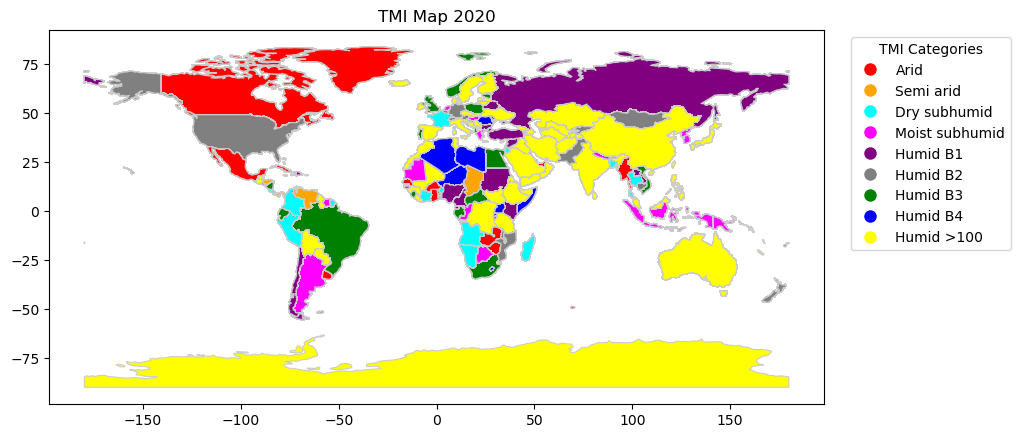

In [1227]:
#Create TMI map

# Add the TMI categories based on the ranges you specified
TMI_cat['TMI'] = pd.cut(TMI_cat['TMI'], 
                                    bins=[-float('inf'), -40, -20, 0, 20, 40, 60, 80, 100, float('inf')],
                                    labels=['Arid', 'Semi arid', 'Dry subhumid', 'Moist subhumid',
                                        'Humid B1', 'Humid B2', 'Humid B3', 'Humid B4','Humid >100'])

time_period = TMI_cat['Year'].iloc[0] #return the first value of the column year


# Create a GeoDataFrame for visualization
geometry = [Point(lon, lat) for lon, lat in zip(TMI_cat['Lon'], TMI_cat['Lat'])]
geo_tmi_df = gpd.GeoDataFrame(TMI_cat, geometry=geometry)

# Load a world map for plotting
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Perform a spatial join to combine the TMI data with the world map data
#mergedS = gpd.sjoin(world, geo_tmi_df, how='left', op='intersects')

# Create a colormap that matches your TMI categories
custom_cmap = {
    'Arid': 'orange',
    'Semi arid': 'orange',
    'Dry subhumid': 'cyan',
    'Moist subhumid': 'magenta',
    'Humid B1': 'purple',
    'Humid B2': 'gray',
    'Humid B3': 'green',
    'Humid B4': 'blue',
    'Humid >100': 'yellow'
}

# Map TMI categories to colors based on the custom colormap
geo_tmi_df['TMI_Color'] = geo_tmi_df['TMI'].map(custom_cmap)

# Plot the map using the 'TMI' column and the specified colormap
fig, ax = plt.subplots(figsize=(10, 6))
geo_tmi_df.plot(ax=ax, color=geo_tmi_df['TMI_Color'], linewidth=0.8, edgecolor='0.8')
ax.set_title(f'TMI Map {time_period}')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in custom_cmap.values()]
labels = custom_cmap.keys()
ax.legend(handles, labels, title='TMI Categories', loc='upper right', bbox_to_anchor=(1.25, 1))

# Specify the file path to save the PNG
output_file = f'/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/TMI/TMI maps/TMI categories/TMIN_{time_period}.png'

# Save the plot as a PNG with the specified file path
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()